
## Context

### Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.



#### As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

#### You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.



#### One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

## Problem Statement : 

- The company wants to know:

- • Which variables are significant in predicting the reason for hospitalization for different regions

- • How well some variables like viral load, smoking, Severity Level describe the hospitalization charges



### Column Profiling

    Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
    Sex: This is the policy holder's gender, either male or female
    Viral Load: Viral load refers to the amount of virus in an infected person's blood
    Severity Level: This is an integer indicating how severe the patient is
    Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.
    Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
    Hospitalization charges: Individual medical costs billed to health insurance

- Concept Used:

        Graphical and Non-Graphical Analysis
        2-sample t-test: testing for difference across populations
        ANOVA
        Chi-square





In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom

import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale= 1)

In [2]:
df= pd.read_csv("scaler_apollo_hospitals.csv",index_col=0)

<IPython.core.display.Javascript object>

In [3]:
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


In [6]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [7]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
df.corr()

,age,viral load,severity level,hospitalization charges
age,1.000000,0.109300,0.042469,0.299008
viral load,0.109300,1.000000,0.012729,0.198388
severity level,0.042469,0.012729,1.000000,0.067998
hospitalization charges,0.299008,0.198388,0.067998,1.000000


<AxesSubplot:>

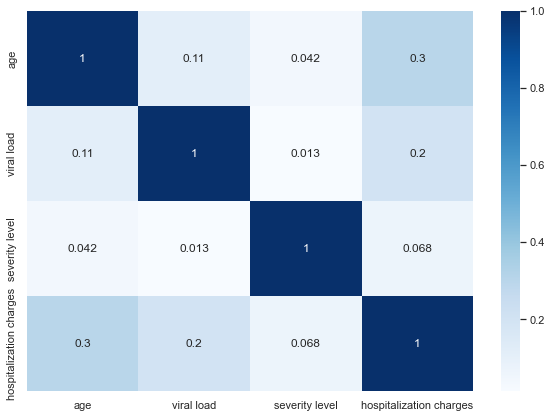

In [9]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(),annot=True,cmap = "Blues")

In [10]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"

In [11]:
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [12]:
for col in ["age","viral load","severity level","hospitalization charges"]:
    
    print(col,"has : ",detect_outliers(df[col]))

age has :  0.0 % Outliers data from input data found
viral load has :  0.0067 % Outliers data from input data found
severity level has :  0.4425 % Outliers data from input data found
hospitalization charges has :  0.1039 % Outliers data from input data found


In [13]:
# outlier presence is not significant. 
# all the columns have outliers less than 5%. 


In [14]:
df.columns = ['age', 'sex', 'smoker', 'region', 'viral_load', 'severity_level',
       'hospitalization_charges']

<AxesSubplot:xlabel='hospitalization_charges', ylabel='Density'>

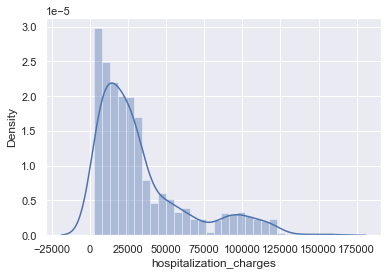

In [15]:
sns.distplot(df["hospitalization_charges"])

<AxesSubplot:xlabel='hospitalization_charges'>

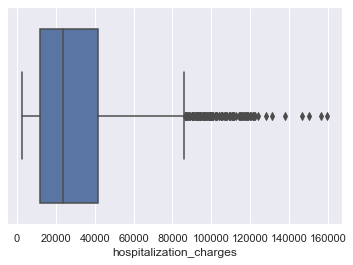

In [16]:
sns.boxplot(df["hospitalization_charges"])

In [17]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral_load', 'severity_level',
       'hospitalization_charges'],
      dtype='object')

<IPython.core.display.Javascript object>

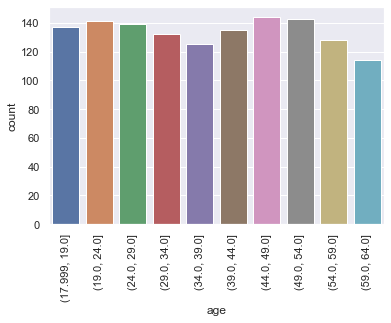

In [18]:
sns.countplot(pd.qcut(df["age"],10))
plt.xticks(rotation = 90)
plt.show()

In [19]:
pd.crosstab(columns = df["region"],
            index   = df["smoker"])

<IPython.core.display.Javascript object>

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [20]:
df

,age,sex,smoker,region,viral_load,severity_level,hospitalization_charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [21]:
df.nunique()

age                          47
sex                           2
smoker                        2
region                        4
viral_load                  462
severity_level                6
hospitalization_charges    1320
dtype: int64

<AxesSubplot:xlabel='severity_level', ylabel='hospitalization_charges'>

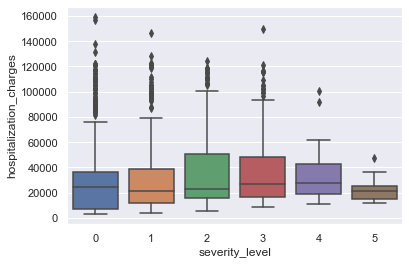

In [22]:
sns.boxplot(y = df["hospitalization_charges"], 
           x = df["severity_level"])

<AxesSubplot:xlabel='region', ylabel='hospitalization_charges'>

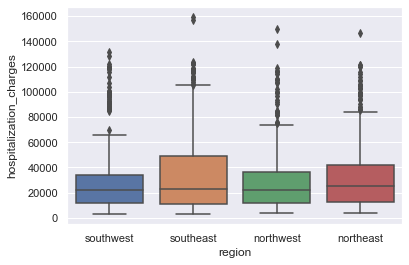

In [23]:
sns.boxplot(y = df["hospitalization_charges"], 
           x = df["region"])

## t-test : checking for population , if the hospitalization charges are higher for smokers ? 

<AxesSubplot:xlabel='smoker', ylabel='hospitalization_charges'>

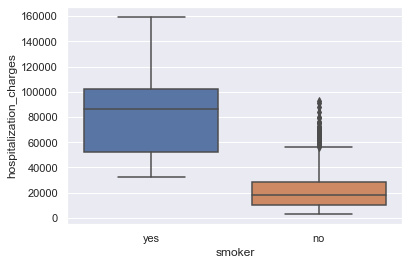

In [24]:
sns.boxplot(y = df["hospitalization_charges"], 
           x = df["smoker"])

#### from above boxplot , hopitalization charges seems to be higher for smokers than who doent smoke.

In [25]:
## t-test : 
## null hypotehsis : H0 : mean hospitalization charges for smokers and non smokers are same.
## alternative hypothesis : Ha : Mean hospitalization charges for smokes is higher than non smokers for population . 

# H0 : smokers_charges <= non_smokers_charges
# Ha : Smokers_charges > non_smokers_charges

In [62]:
smokers = df[df["smoker"]=="yes"]["hospitalization_charges"]
non_smokers = df[df["smoker"]=="no"]["hospitalization_charges"]

In [63]:
smokers.mean(),non_smokers.mean()

(80125.57299270073, 21085.6757518797)

In [64]:
len(smokers),len(non_smokers)

(274, 1064)

In [65]:
non_smokers = non_smokers.sample(274)

In [66]:
n1,n2 = len(smokers),len(non_smokers)

In [67]:
mean_smokers  = smokers.mean()
mean_non_smokers = non_smokers.mean()

In [68]:
mean_smokers,mean_non_smokers

(80125.57299270073, 21256.087591240877)

In [69]:
std_smokers  = smokers.std()
std_non_smokers = non_smokers.std()

In [70]:
test_statistic = (mean_smokers - mean_non_smokers)/(np.sqrt(((std_smokers**2)/(n1))+((std_non_smokers**2)/(n2))))

In [71]:
test_statistic

29.943801024458654

In [72]:
degreeOfFreedom = n1+n2-2

In [73]:
1-stats.t.cdf(test_statistic,degreeOfFreedom)

<IPython.core.display.Javascript object>

0.0

In [74]:
stats.t.ppf(0.95,degreeOfFreedom)

<IPython.core.display.Javascript object>

1.6476491829074837

In [75]:
stats.ttest_ind(smokers,non_smokers,    alternative='greater')

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=29.94380102445866, pvalue=1.3775002711997363e-117)

#### from the p-value  we can observe the probability of having hospilization charges for smokers  than non-smokers is is very high. 


#### Thus from hypothesis test , we reject null hypothesis and conclude that hospitalization charges for Smokers are higher than Non Smokers.

## t-test : checking for population , if the hospitalization charges are same for make and female ? 

<AxesSubplot:xlabel='sex', ylabel='hospitalization_charges'>

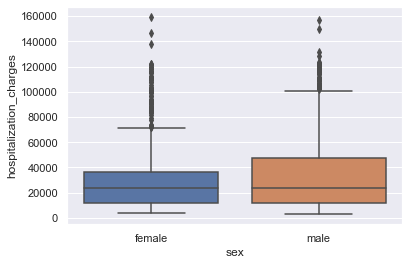

In [41]:
sns.boxplot(y = df["hospitalization_charges"], 
           x = df["sex"])

In [42]:
female_charges = df[df["sex"]=="female"]["hospitalization_charges"].sample(500)
male_charges = df[df["sex"]=="male"]["hospitalization_charges"].sample(500)

In [43]:
male_charges.mean(),female_charges.mean()

(35685.656, 31063.28)

In [44]:
len(male_charges),len(female_charges)

(500, 500)

In [45]:
n1,n2 = len(female_charges),len(male_charges)

In [46]:
mean_female_charges  = female_charges.mean()
mean_male_charges = male_charges.mean()

In [47]:
mean_female_charges,mean_male_charges

(31063.28, 35685.656)

In [48]:
std_female_charges  = female_charges.std()
std_male_charges = male_charges.std()

In [49]:
test_statistic = (mean_female_charges - mean_male_charges)/(np.sqrt(((std_female_charges**2)/(n1))+((std_male_charges**2)/(n2))))

In [50]:
test_statistic

-2.413365317468039

In [51]:
degreeOfFreedom = n1+n2-2

In [52]:
stats.t.cdf(test_statistic,degreeOfFreedom)*2

<IPython.core.display.Javascript object>

0.015985256135108653

In [53]:
stats.t.ppf(0.025,degreeOfFreedom),stats.t.ppf(0.975,degreeOfFreedom)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-1.962343846216334, 1.9623438462163336)

In [54]:
stats.ttest_ind(male_charges,female_charges)

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=2.4133653174680387, pvalue=0.015985256135108664)

In [56]:
for r in range(10):
    print(stats.ttest_ind(male_charges.sample(100),female_charges.sample(100)))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=1.1607404079952375, pvalue=0.24714503161457332)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.6481956390149956, pvalue=0.5176093992007929)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=1.5440034867840289, pvalue=0.12418423752627347)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=2.0045366073713606, pvalue=0.04637494924544995)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.929748538331141, pvalue=0.3536334277389356)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=2.426480912816254, pvalue=0.01614172974678211)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.8758699430032006, pvalue=0.3821620599112646)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.15373083084902536, pvalue=0.8779785439653502)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=1.2308917099747159, pvalue=0.21982352936974006)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=1.5239066500616154, pvalue=0.12912762619853874)


#### from above ttest , we can observe the significant p-values , so we failed to reject null hypotehsis and hence we can conclude that hospitalization charges are same for male and female ,.

<AxesSubplot:xlabel='hospitalization_charges', ylabel='Density'>

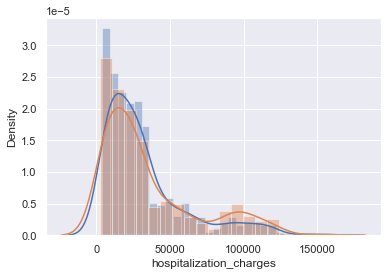

In [79]:
sns.distplot(df[df["sex"]=="female"]["hospitalization_charges"])
sns.distplot(df[df["sex"]=="male"]["hospitalization_charges"])

In [91]:
for r in range(5):
    print(stats.ks_2samp(data1 = df[df["sex"]=="female"]["hospitalization_charges"].sample(500),
              data2 = df[df["sex"]=="male"]["hospitalization_charges"].sample(500)))

<IPython.core.display.Javascript object>

KstestResult(statistic=0.076, pvalue=0.11136835555551457)


<IPython.core.display.Javascript object>

KstestResult(statistic=0.084, pvalue=0.058689209417416795)


<IPython.core.display.Javascript object>

KstestResult(statistic=0.074, pvalue=0.12939616996710074)


<IPython.core.display.Javascript object>

KstestResult(statistic=0.076, pvalue=0.11136835555551457)


<IPython.core.display.Javascript object>

KstestResult(statistic=0.072, pvalue=0.14973189477810775)


#### also for KS- for distribution .,wecan observe the significance value to be greater than 0.05 and hence can conclude the distribution for hospitalization chanrges for male and female is same.

## Is the proportion of smoking significantly different across different regions?

In [94]:
observed = pd.crosstab(columns = df["region"],
           index= df["smoker"])
observed

<IPython.core.display.Javascript object>

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [99]:
row_sum = np.array(np.sum(observed,axis = 1))

col_sum = np.array(np.sum(observed,axis = 0))

In [100]:
row_sum,col_sum

(array([1064,  274], dtype=int64), array([324, 325, 364, 325], dtype=int64))

In [102]:
total_sum = np.sum(np.sum(observed))
total_sum

1338

In [103]:
expected = []
for i in row_sum:
    expected.append((i*col_sum)/total_sum)
expected

[array([257.65022422, 258.44544096, 289.45889387, 258.44544096]),
 array([66.34977578, 66.55455904, 74.54110613, 66.55455904])]

In [104]:
expected = pd.DataFrame(expected, columns= observed.columns)

<IPython.core.display.Javascript object>

In [106]:
expected.index = observed.index


In [107]:
expected

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257.650224,258.445441,289.458894,258.445441
yes,66.349776,66.554559,74.541106,66.554559


In [108]:
o_e_2_by_e = ((observed-expected)**2)/expected


In [109]:
np.sum(np.sum(o_e_2_by_e))   # test statistic


7.343477761407071

In [110]:
stats.chi2.ppf(0.95,df=3)  # chi-sq critical value


<IPython.core.display.Javascript object>

7.814727903251179

In [111]:
1-stats.chi2.cdf(7.343477761407071,3)

<IPython.core.display.Javascript object>

0.06171954839170546

In [112]:
stats.chi2_contingency(observed)


<IPython.core.display.Javascript object>

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

#### from above chi-square test of independence we failed to reject null hypothesis , hence we conclude that proportion of smoking across different region is same.

### viral_load

<AxesSubplot:xlabel='viral_load', ylabel='Density'>

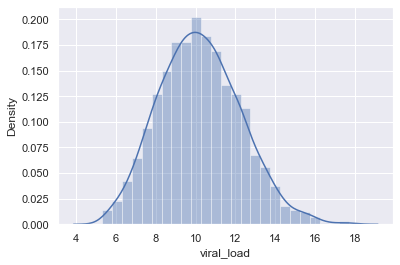

In [153]:
sns.distplot(df["viral_load"])

In [120]:
pd.crosstab(columns = df["sex"],
           index  = df["severity_level"],
           values = df["viral_load"],
           aggfunc = np.mean)

<IPython.core.display.Javascript object>

sex,female,male
severity_level,,
0,10.120727,10.247544
1,10.017468,10.388494
2,10.216807,10.433554
3,10.145974,10.307375
4,10.647273,10.320000
5,10.206250,9.598000


<IPython.core.display.Javascript object>

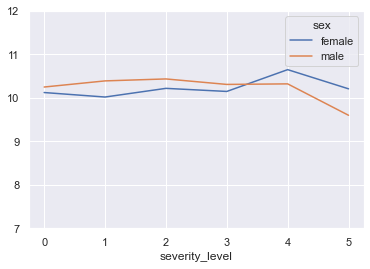

In [155]:
pd.crosstab(columns = df["sex"],
           index  = df["severity_level"],
           values = df["viral_load"],
           aggfunc = np.mean).plot()
plt.ylim(7,12)
plt.show()

<AxesSubplot:xlabel='viral_load', ylabel='Density'>

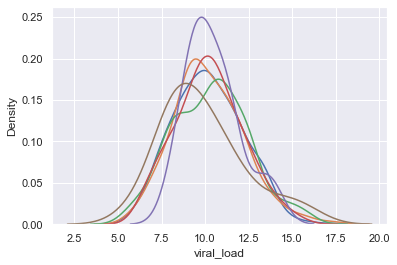

In [136]:
sns.kdeplot(df[df["severity_level"]==0]["viral_load"])
sns.kdeplot(df[df["severity_level"]==1]["viral_load"])
sns.kdeplot(df[df["severity_level"]==2]["viral_load"])
sns.kdeplot(df[df["severity_level"]==3]["viral_load"])
sns.kdeplot(df[df["severity_level"]==4]["viral_load"])
sns.kdeplot(df[df["severity_level"]==5]["viral_load"])

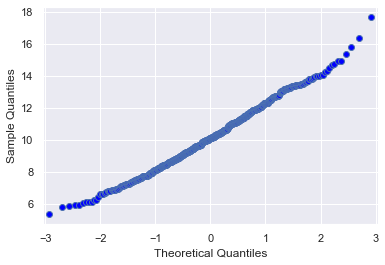

In [150]:
sm.qqplot((df[df["severity_level"]==0]["viral_load"]))
plt.show()

In [132]:
df[df["severity_level"]==0]["viral_load"].mean(),df[df["severity_level"]==1]["viral_load"].mean(),df[df["severity_level"]==2]["viral_load"].mean(),df[df["severity_level"]==3]["viral_load"].mean(),df[df["severity_level"]==4]["viral_load"].mean(),df[df["severity_level"]==5]["viral_load"].mean()

(10.183693379790936,
 10.207561728395063,
 10.326083333333333,
 10.22821656050955,
 10.464,
 9.868333333333332)

In [130]:
stats.f_oneway(df[df["severity_level"]==0]["viral_load"],
df[df["severity_level"]==1]["viral_load"],
df[df["severity_level"]==2]["viral_load"],
df[df["severity_level"]==3]["viral_load"],
df[df["severity_level"]==4]["viral_load"],
df[df["severity_level"]==5]["viral_load"])

<IPython.core.display.Javascript object>

F_onewayResult(statistic=0.3491094504719582, pvalue=0.883007195713889)

In [134]:
womendata = df[df["sex"]=="female"]

In [135]:
stats.f_oneway(womendata[womendata["severity_level"]==0]["viral_load"],
womendata[womendata["severity_level"]==1]["viral_load"],
womendata[womendata["severity_level"]==2]["viral_load"],
womendata[womendata["severity_level"]==3]["viral_load"],
womendata[womendata["severity_level"]==4]["viral_load"],
womendata[womendata["severity_level"]==5]["viral_load"])

<IPython.core.display.Javascript object>

F_onewayResult(statistic=0.2900065466233716, pvalue=0.9185708092374022)

In [ ]:
df.columns

In [ ]:
sns.jointplot(df["viral_load"],df["hospitalization_charges"])

In [ ]:
sns.jointplot(df["age"],df["hospitalization_charges"])

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap = "Blues")